In [2]:
import numpy as np
import matplotlib.pyplot as plt

decaytxt = np.loadtxt('MCMC_inputs/Mean_displacement_decays/Ridgecrest2_mean_displacement_decay.txt',delimiter=',') # from Matlab output
x_Ridgecrest2 = decaytxt[:,0] # fault-perpendicular distance in meters
disp_Ridgecrest2 = decaytxt[:,1] # feature density at a given distance (per sqm)
bestfit_Ridgecrest2 = np.loadtxt('MCMC_outputs/Ridgecrest2_best_fit_parameters_displacement.txt')

decaytxt = np.loadtxt('MCMC_inputs/Mean_displacement_decays/Ridgecrest1_mean_displacement_decay.txt',delimiter=',') # from Matlab output
x_Ridgecrest1 = decaytxt[:,0] # fault-perpendicular distance in meters
disp_Ridgecrest1 = decaytxt[:,1] # feature density at a given distance (per sqm)
bestfit_Ridgecrest1 = np.loadtxt('MCMC_outputs/Ridgecrest1_best_fit_parameters_displacement.txt')

decaytxt = np.loadtxt('MCMC_inputs/Mean_displacement_decays/Landers_mean_displacement_decay.txt',delimiter=',') # from Matlab output
x_Landers = decaytxt[:,0] # fault-perpendicular distance in meters
disp_Landers = decaytxt[:,1] # feature density at a given distance (per sqm)
bestfit_Landers= np.loadtxt('MCMC_outputs/Landers_best_fit_parameters_displacement.txt')

decaytxt = np.loadtxt('MCMC_inputs/Mean_displacement_decays/HectorMine_mean_displacement_decay.txt',delimiter=',') # from Matlab output
x_HectorMine = decaytxt[:,0] # fault-perpendicular distance in meters
disp_HectorMine = decaytxt[:,1] # feature density at a given distance (per sqm)
bestfit_HectorMine = np.loadtxt('MCMC_outputs/HectorMine_best_fit_parameters_displacement.txt')

decaytxt = np.loadtxt('MCMC_inputs/Mean_displacement_decays/EMC_mean_displacement_decay.txt',delimiter=',') # from Matlab output
x_EMC = decaytxt[:,0] # fault-perpendicular distance in meters
disp_EMC = decaytxt[:,1] # feature density at a given distance (per sqm)
bestfit_EMC = np.loadtxt('MCMC_outputs/EMC_best_fit_parameters_displacement.txt')

In [3]:
def model(x,B,n):
    return B * (((x+1)/1))**-n

In [4]:
model_Ridgecrest1 = model(x_Ridgecrest1,bestfit_Ridgecrest1[0],bestfit_Ridgecrest1[1])
model_Ridgecrest2 = model(x_Ridgecrest2,bestfit_Ridgecrest2[0],bestfit_Ridgecrest2[1])
model_Landers = model(x_Landers,bestfit_Landers[0],bestfit_Landers[1])
model_HectorMine = model(x_HectorMine,bestfit_HectorMine[0],bestfit_HectorMine[1])
model_EMC = model(x_EMC,bestfit_EMC[0],bestfit_EMC[1])

resRidgecrest1 = np.abs(disp_Ridgecrest1-model_Ridgecrest1)
resRidgecrest2 = np.abs(disp_Ridgecrest2-model_Ridgecrest2)
resEMC = np.abs(disp_EMC-model_EMC)
resLanders = np.abs(disp_Landers-model_Landers)
resHectorMine = np.abs(disp_HectorMine-model_HectorMine)

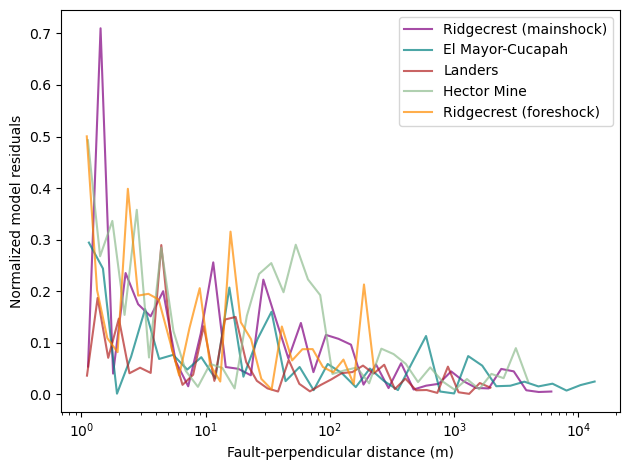

In [5]:
plt.figure()

plt.plot(x_Ridgecrest2,resRidgecrest2/bestfit_Ridgecrest2[0], c='purple',alpha=0.7,label='Ridgecrest (mainshock)')
plt.plot(x_EMC,resEMC/bestfit_EMC[0], c='teal',alpha=0.7,label='El Mayor-Cucapah')
plt.plot(x_Landers,resLanders/bestfit_Landers[0], c='firebrick',alpha=0.7,label='Landers')
plt.plot(x_HectorMine,resHectorMine/bestfit_HectorMine[0], c='darkseagreen',alpha=0.7,label='Hector Mine')
plt.plot(x_Ridgecrest1,resRidgecrest1/bestfit_Ridgecrest1[0], c='darkorange',alpha=0.7,label='Ridgecrest (foreshock)')

plt.ylabel('Normalized model residuals')
plt.xlabel('Fault-perpendicular distance (m)')

plt.xscale('log')


plt.legend()

plt.tight_layout()
plt.savefig('Model_outputs/Model_residuals_displacement_event.pdf')
plt.show()